In [40]:
import skimage as ski
import os
import matplotlib.pyplot as plt

def show_image(image, title=None):
    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    if title:
        plt.title(title)
    plt.show()

def plot_toh(image, title=None):
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.show()

### Load image

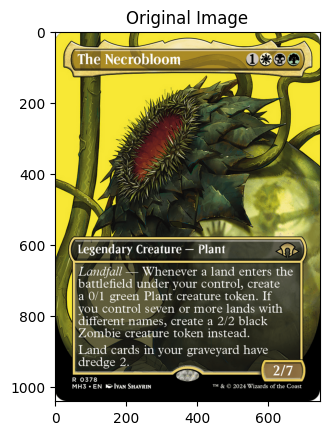

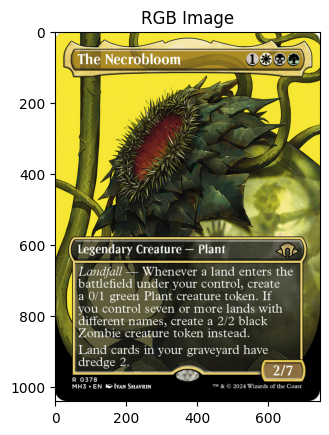

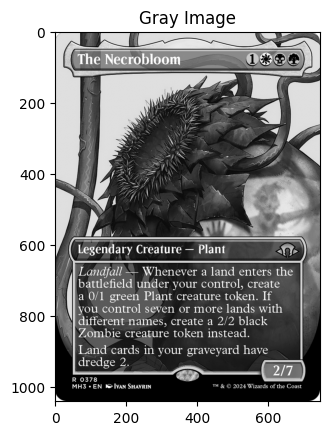

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], shape=(1040, 745))

In [41]:
path_to_images = os.path.join(os.getcwd(), 'images', 'mh3-378-the-necrobloom.png')
image_original = ski.io.imread(path_to_images)
image_rgb = ski.color.rgba2rgb(image_original)
image_gray = ski.color.rgb2gray(image_rgb)
show_image(image_original, 'Original Image')
show_image(image_rgb, 'RGB Image')
show_image(image_gray, 'Gray Image')
image_gray


## Extract image
- First just locate the borders of topline, textbox and bottomline and then extract everyting outside of it
- Later maybe try to just get rid of topline, textbox and bottomline and also get the art behind these boxes

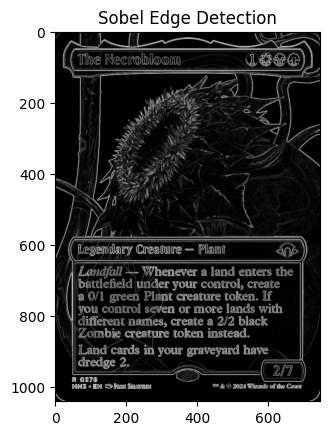

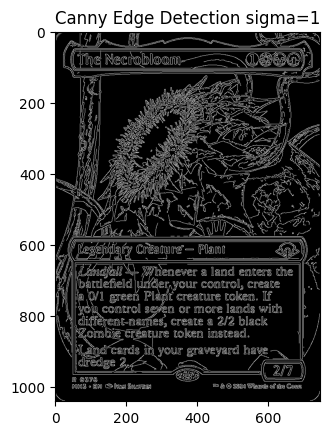

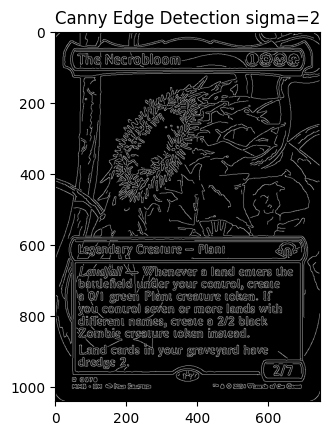

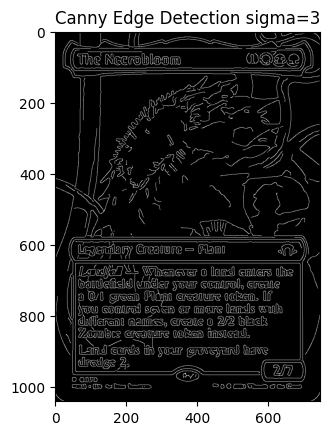

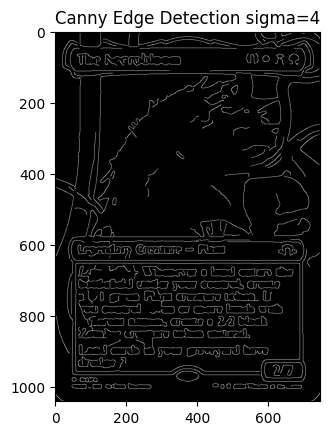

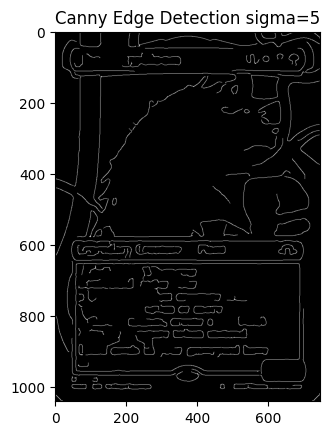

In [47]:
# edge detection in the image
edges_sobel = ski.filters.sobel(image_gray)
show_image(edges_sobel, 'Sobel Edge Detection')
for sigma in range(1, 6):
    edges_canny = ski.feature.canny(image_gray, sigma=sigma)
    show_image(edges_canny, f'Canny Edge Detection sigma={sigma}')

Found 1846 contours


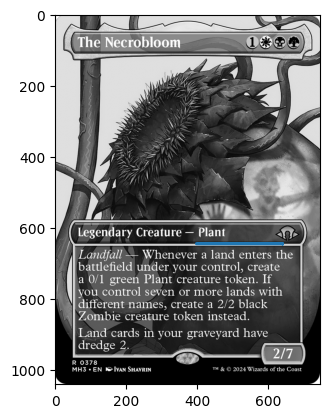

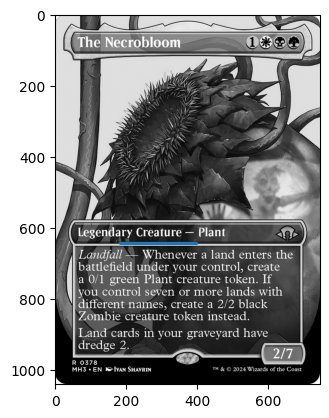

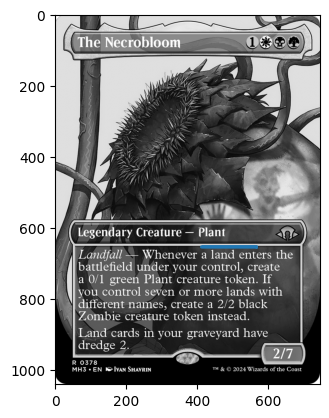

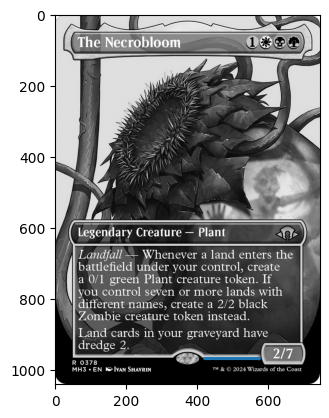

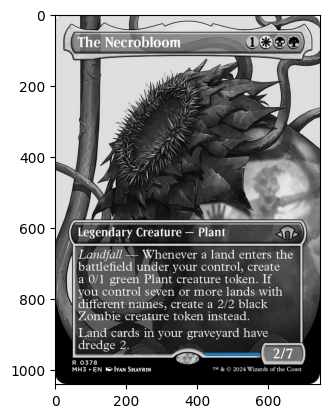

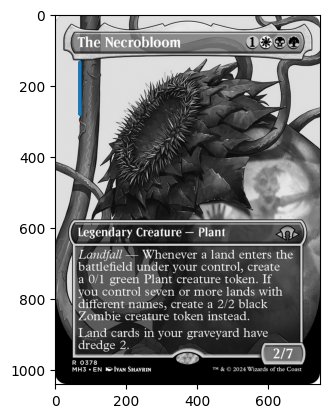

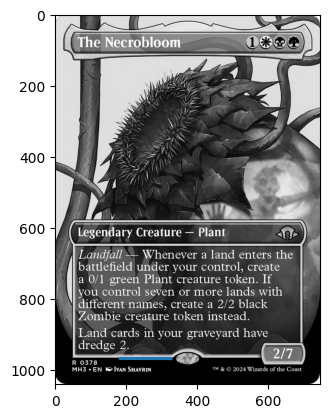

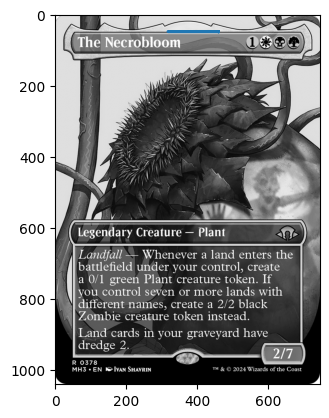

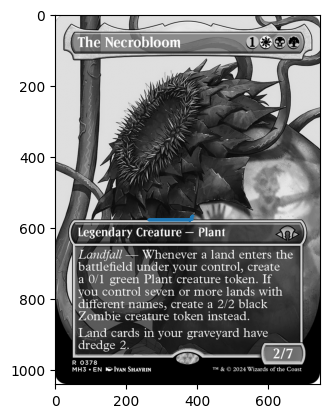

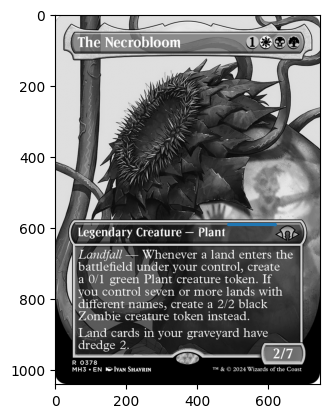

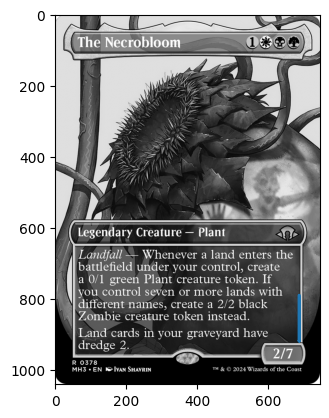

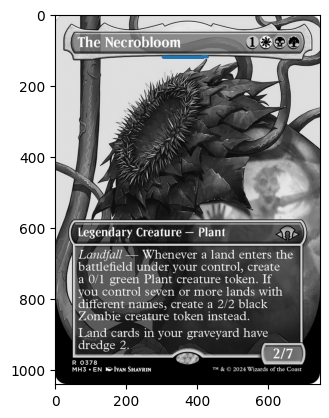

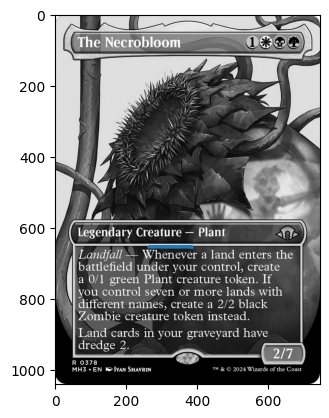

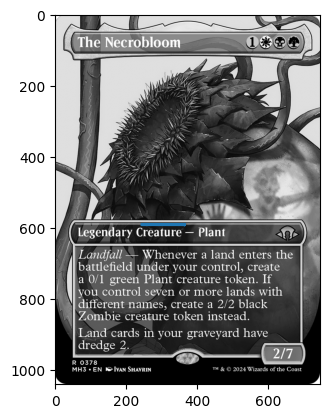

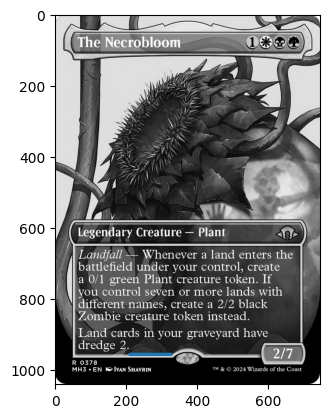

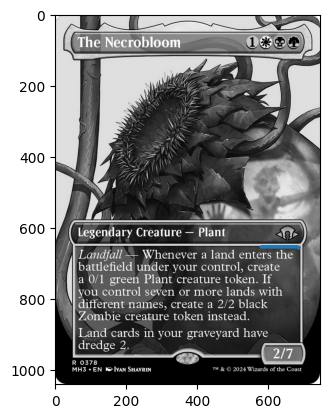

KeyboardInterrupt: 

In [57]:
contours = ski.measure.find_contours(edges_canny)
print(f'Found {len(contours)} contours')
# sort the contours by length
contours = sorted(contours, key=len, reverse=True)
# plot the contours
for contour in contours:
    plt.imshow(image_gray, cmap='gray')
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2) 
    plt.show()